In [1]:
import torch
from PIL import Image
from definitions import ROOT_DIR
import os

image_path = os.path.join(ROOT_DIR, "laparoscopy_mucus.png")
device = "cuda" if torch.cuda.is_available() else "cpu"
raw_image = Image.open(image_path)

In [121]:
from transformers import Sam2Processor, Sam2Model

model = Sam2Model.from_pretrained("facebook/sam2-hiera-large").to(device)
processor = Sam2Processor.from_pretrained("facebook/sam2-hiera-large")

You are using a model of type sam2_video to instantiate a model of type sam2. This is not supported for all configurations of models and can yield errors.


In [122]:
# Add both positive and negative points to refine the mask
input_points = [[[[300, 600]]]]  # Multiple points for refinement
input_labels = [[[1]]]  # Both positive clicks

inputs = processor(images=raw_image, input_points=input_points, input_labels=input_labels, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

masks = processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"])[0]


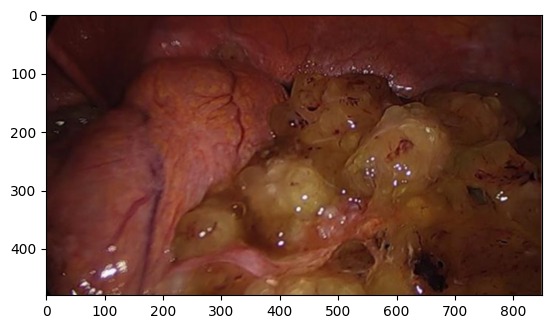

In [123]:
import matplotlib.pyplot as plt

plt.imshow(raw_image)
plt.show()

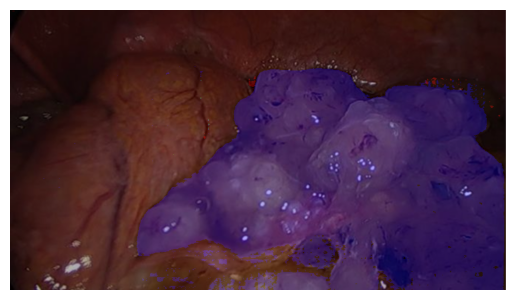

In [124]:
import matplotlib.pyplot as plt

mask = torch.transpose(masks[0], 0, -1)
mask = torch.transpose(mask, 0, 1).float()
plt.imshow(raw_image)
plt.imshow(mask, cmap='binary', alpha=0.3)
plt.axis('off')
plt.show()


In [89]:
mask.unique()

tensor([0., 1.])